In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
cc=pd.read_csv("C:\\Users\\prasa\\Downloads\\CocaCola_Sales_Rawdata.csv")
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [31]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [32]:
cc.describe

<bound method NDFrame.describe of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q

In [33]:
cc.duplicated().values.any()

False

In [34]:
cc.isnull().values.any()

False

<AxesSubplot:>

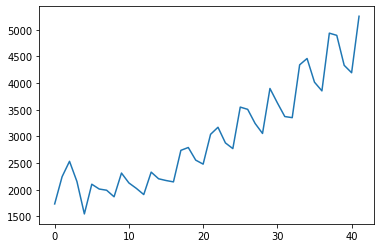

In [35]:
cc.Sales.plot()

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

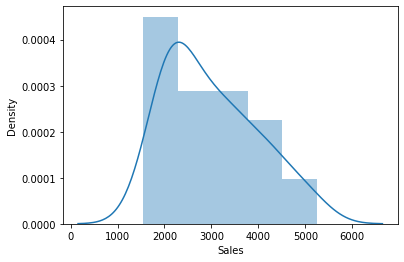

In [36]:
sns.distplot(cc['Sales'], bins=5)

In [37]:
quart = ['Q1', 'Q2', 'Q3', 'Q4']
n= cc['Quarter'][0]
n[0:2]
cc['quart']=0

In [38]:
for i in range(len(cc)):
    n=cc['Quarter'][i]
    cc['quart'][i]=n[0:2]

<ipython-input-38-5479593c76da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['quart'][i]=n[0:2]
C:\Users\prasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
dummy = pd.DataFrame(pd.get_dummies(cc['quart']))
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [40]:
cc1= pd.concat((cc, dummy), axis=1)
cc1.head()

,Quarter,Sales,quart,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0


In [41]:
t = np.arange(1,43)

In [42]:
cc1['t']=t
cc1['t_square']=cc1['t']*cc1['t']
log_Sales = np.log(cc1['Sales'])
cc1['log_Sales']=log_Sales

In [43]:
cc1.head()

,Quarter,Sales,quart,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [44]:
train=cc1.head(30)
test=cc1.tail(12)

#### Linear Model

In [45]:
import statsmodels.formula.api as smf
linear_model = smf.ols("Sales~t", data= train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_linear))**2))
rmse_linear

714.014448381833

#### Quadratic Model

In [46]:
quad = smf.ols('Sales~t+t_square', data= train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_quad))**2))
rmse_quad

646.2715428656084

#### Exponential Model

In [47]:
exp = smf.ols('log_Sales~t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

552.2821039688199

#### Additive seasonality

In [48]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea =  np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467723998

#### Additive Seasonality Quadratic 

In [49]:
add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4', data = train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

586.0533068427447

#### Multiplicative seasonality

In [50]:
Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1828.9238911891832

#### Multiplicative additive seasonality

In [51]:
Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4', data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

410.2497060538331

In [52]:
# Compare the Results
models = {'Model': pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]), 'RMSE_Values': pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(models)
table_rmse

,Model,RMSE_Values
0,rmse_linear,714.014448
1,rmse_exp,552.282104
2,rmse_quad,646.271543
3,rmse_add_sea,1778.006547
4,rmse_add_sea_quad,586.053307
5,rmse_Mult_sea,1828.923891
6,rmse_Mult_add_sea,410.249706


### Model with low RMSE is best always. Here Multiplicative additive seasonality has low RMSE, so it is the best model. 